# Real Estate Market Analysis 

***Company XYZ (Short-term rental real estate company) aims to analyze guest demand and host response trends in Bali to optimize listings and increase bookings. This includes examining guest search behavior (dates, duration, room type, price filters), identifying host acceptance patterns, and addressing gaps between supply and demand to enhance host participation. Additionally, the analysis will assess data needs to refine market insights and improve overall booking efficiency.***

**Company XYZ wants to understand:**

- Guest search trends in Bali
- Host acceptance patterns and key influencing factors
- Gaps between guest demand and available listings
- Additional insights to enhance market understanding

**The objective is to analyze, visualize, and communicate Bali’s rental market dynamics.**

### **0. Data Exploration**

In [1]:
#Import libraries/dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

contacts_file = ("contacts.tsv")
contacts = pd.read_csv(contacts_file, sep="\t")

searches_file = ("searches.tsv")
searches = pd.read_csv(searches_file, sep="\t")

In [2]:
#Find % of null values in datasets 
print('Contacts')
print(contacts.isna().sum()/len(contacts), '\n')
print('Searches')
print(searches.isna().sum()/len(searches))

Contacts
id_guest          0.000000
id_host           0.000000
id_listing        0.000000
ts_contact_at     0.000000
ts_reply_at       0.077208
ts_accepted_at    0.536367
ts_booking_at     0.722101
ds_checkin        0.000000
ds_checkout       0.000000
n_guests          0.000000
n_messages        0.000000
dtype: float64 

Searches
ds                      0.000000
id_user                 0.000000
ds_checkin              0.331561
ds_checkout             0.331561
n_searches              0.000000
n_nights                0.331561
n_guests_min            0.000000
n_guests_max            0.000000
origin_country          0.000000
filter_price_min        0.627221
filter_price_max        0.627221
filter_room_types       0.546940
filter_neighborhoods    0.962336
dtype: float64


***The **neighborhood** column in the searches dataset contains **96.23% null values**, which may lead to inaccurate demand assumptions. Since "City Centre" appears frequently among the available data, further investigation with additional data is needed to validate its significance.***

### **1. "searches" Dataset**

In [3]:
#Drop filter_neighborhoods column

searches = searches.drop(columns=['filter_neighborhoods'])

In [4]:
#Manipulation of searches dataset

#Convert date column to datetime data type for easier analysis
searches['ds'] = pd.to_datetime(searches['ds'])
searches['ds_checkin'] = pd.to_datetime(searches['ds_checkin'])
searches['ds_checkout'] = pd.to_datetime(searches['ds_checkout'])

#How soon they want the room
searches['length_preperation'] = searches['ds_checkin'] - searches['ds']

In [5]:
#Describe searches dataset

#Helps understand the dataset and its distribution of values within columns better
display(searches.describe())

,ds,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,filter_price_min,filter_price_max,length_preperation
count,35737,23888,23888,35737.000000,23888.000000,35737.000000,35737.000000,13322.000000,1.332200e+04,23888
mean,2014-10-07 14:32:34.478551552,2014-11-27 22:42:10.609511168,2014-12-05 14:50:57.468184832,9.206565,7.672765,1.742955,2.105857,8.470200,9.019063e+07,51 days 08:11:53.730743469
min,2014-10-01 00:00:00,2014-10-01 00:00:00,2014-10-02 00:00:00,1.000000,0.000000,1.000000,1.000000,0.000000,9.000000e+00,-1 days +00:00:00
25%,2014-10-04 00:00:00,2014-10-17 00:00:00,2014-10-23 00:00:00,1.000000,2.000000,1.000000,1.000000,0.000000,8.600000e+01,10 days 00:00:00
50%,2014-10-08 00:00:00,2014-11-03 00:00:00,2014-11-09 00:00:00,4.000000,3.000000,1.000000,2.000000,0.000000,1.390000e+02,26 days 00:00:00
75%,2014-10-11 00:00:00,2014-12-13 00:00:00,2014-12-24 00:00:00,10.000000,5.000000,2.000000,2.000000,0.000000,3.010000e+02,67 days 00:00:00
max,2014-10-14 00:00:00,2016-06-02 00:00:00,2016-08-17 00:00:00,448.000000,399.000000,16.000000,16.000000,1250.000000,1.073742e+09,604 days 00:00:00
std,NaN,NaN,NaN,17.348746,21.557614,1.460440,1.817358,53.987679,2.978482e+08,65 days 18:56:19.491940518


The data indicates that most guests book for **one or two people**, as both the **25th and 75th percentiles** show guest counts of **1 and 2**, respectively. This suggests a preference for smaller accommodations.

In [6]:
#Calculate skewness in searches dataset

display(searches.skew(axis = 0, numeric_only = True, skipna = True))

n_searches           7.509258
n_nights             9.942364
n_guests_min         3.583798
n_guests_max         3.148548
filter_price_min    11.087745
filter_price_max     2.999833
dtype: float64

All numeric columns have a Fisher-Pearson coefficient value greater than 1. This results in a positive skewness. With more time, I would have used a transformation method such as log transformation to reduce the skewness

### **1.1 Distributions**

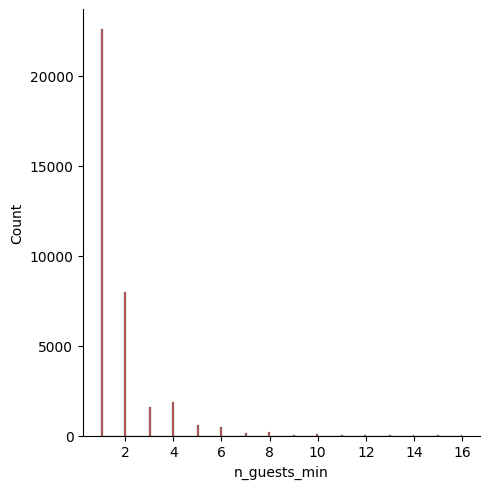

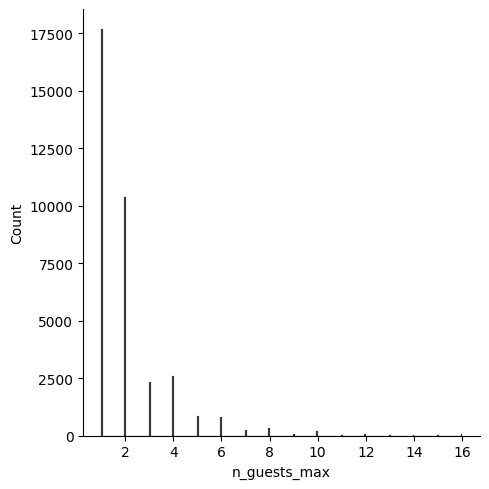

In [8]:
#Distribution plot of n_guests_min and n_guests_max
sns.displot(searches, x = 'n_guests_min', color = 'brown')
sns.displot(searches, x = 'n_guests_max', color = 'black')
plt.show()

**Both have similar distributions with 1 being the most popular option and 2 being the next popular option.**

[[None, None, None, None, None, None, None]]

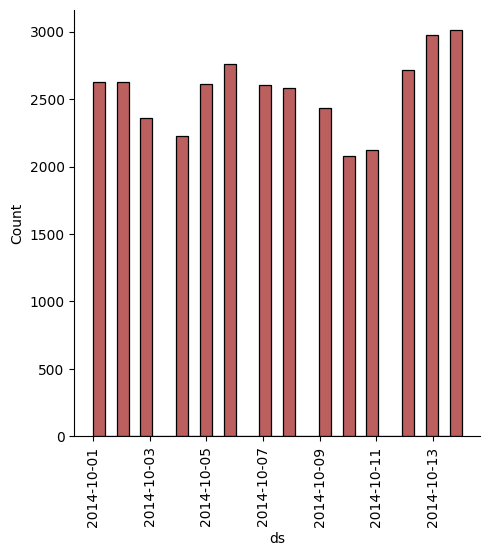

In [9]:
#When were searches conducted

ax = sns.displot(searches, x = 'ds', color = 'brown')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in ax.axes.flat]

**Noticed all date searches were between October 1st to October 14th. No major variation in when search was conducted between these dates**

In [10]:
#Percentage of dataset with a filter_price_max above 600

print(len(searches[searches['filter_price_max'] > 600])/len(searches['filter_price_max'])*100, '%')

5.311022189887232 %


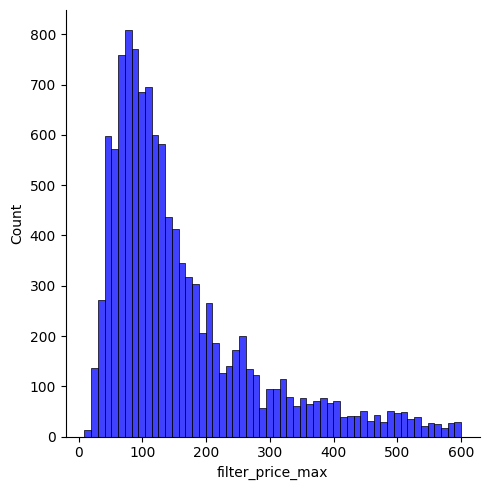

In [11]:
#Distribution of filter_price_max of searches

#Removing the set upper limit
searches_maxprice_removed = searches[searches['filter_price_max'] <= 600]

#Distribution plot of filter_price_max column
sns.displot(x=searches_maxprice_removed["filter_price_max"], color = 'blue')
plt.show()

**Filter_price_max was used** instead of filter_price_min, as the **minimum price is often set to $0.**

To **better visualize trends**, filter_price_max was **capped at $600**, as only **14.25%** of the dataset exceeds this value.

9.396423874415872 % 



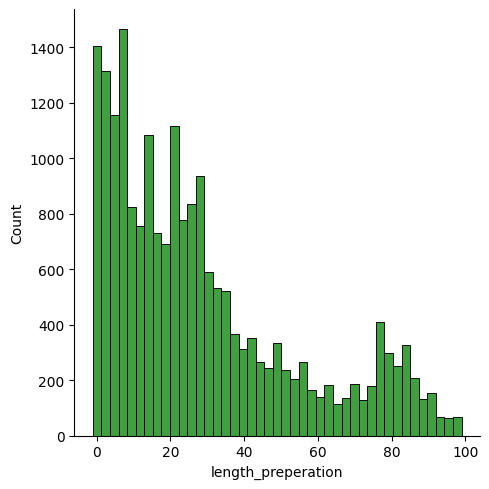

In [13]:
#Distribution of length_preperation of searches

#Percentage of dataset beyond 100 days
distribution = searches["length_preperation"] / np.timedelta64(1, 'D')
print(len(distribution[distribution > 100])/len(distribution)*100, '% \n')

#Remove values beyond 100 days
distribution = distribution[distribution < 100]

#Distribution plot of length_preperation column
sns.displot(x=distribution, color = 'green')
plt.show()

**100 days was chosen as the limit since only 14.06% of the dataset exists beyond that**

4.737387021854101 % 



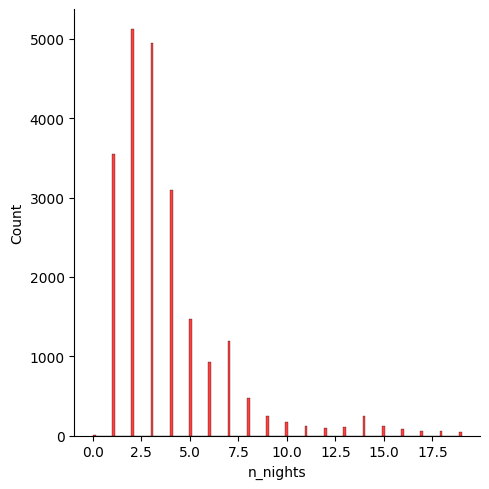

In [14]:
#Distribution of n_nights of searches

#Percentage of dataset beyond 20 nights
print(len(searches[searches['n_nights'] > 20])/len(searches['n_nights'])*100, '% \n')

#Remove n_nights beyond 20 days
searches_within_twenty = searches[searches['n_nights'] < 20]

#Distribution plot of length_preperation column
sns.displot(searches_within_twenty, x='n_nights', color = 'red')
plt.show()

**Removing n_nights beyond 20 days since only 7.3% of the dataset exists beyond 20 days**

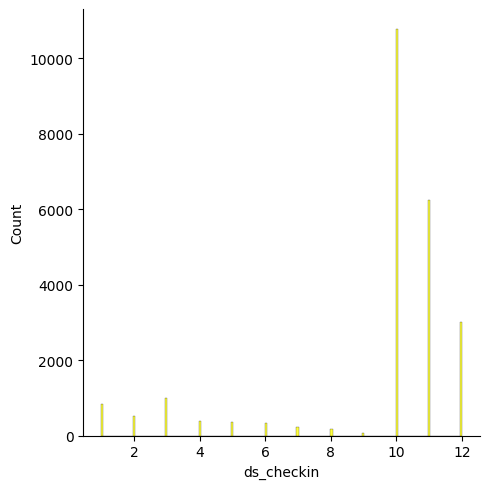

In [15]:
#Distribution of months of ds_checkin of searches

checkin_month = pd.DatetimeIndex(searches['ds_checkin']).month

#Distribution plot of length_preperation column
sns.displot(checkin_month, color = 'yellow')
plt.show()

Only the **check-in month** was used, as most checkouts occur within **5 to 6 days**. After removing outliers, the **average stay duration** is **5.6 nights**, supporting this assumption.

In [16]:
#Types of rooms searched for

searches['filter_room_types'].unique()[0:15] #Display first 15 unique values

array([',Entire home/apt,Entire home/apt,Private room,Private room', nan,
       ',Entire home/apt',
       'Entire home/apt,Entire home/apt,Private room,Private room',
       'Entire home/apt', ',Shared room,Private room',
       'Entire home/apt,Private room,Shared room,Private room,Shared room',
       'Private room', 'Entire home/apt,Private room', ',Private room',
       ',Entire home/apt,Private room',
       ',Entire home/apt,Private room,Private room',
       'Entire home/apt,Private room,Shared room',
       ',Entire home/apt,Entire home/apt,Private room',
       ',Entire home/apt,Entire home/apt,Shared room,Shared room'],
      dtype=object)

Most guests requested **entire homes/apartments** or **private rooms**, with occasional searches for **shared rooms**. Given more time, I would have cleaned this column, as many filter values are repeated within the same cell. Since the Airbnb platform categorizes listings into **Entire Place, Private Room, Hotel Room, and Shared Room**, analyzing the frequency of these four strings would provide clearer insights.

In [18]:
#Find top 15 countries where searches originate from

#Group by origin country and finding the count of each country
search_origin = searches.groupby("origin_country").agg({'origin_country' : 'count'})
search_origin.columns = ['count']

search_origin = search_origin.sort_values('count', ascending = False) #Sort count in descending order
search_origin.nlargest(15, 'count') #Find the 15 largest values

,count
origin_country,
IE,6608
US,5811
GB,4832
FR,3444
IT,2333
DE,2170
ES,1759
CA,1085
AU,962


### **2. "contracts" Dataset**

In [19]:
#Manipulation of contacts dataset

#Convert date columns to datetime data type 
contacts['ts_contact_at'] = pd.to_datetime(contacts['ts_contact_at'])
contacts['ts_reply_at'] = pd.to_datetime(contacts['ts_reply_at'])
contacts['ts_accepted_at'] = pd.to_datetime(contacts['ts_accepted_at'])
contacts['ts_booking_at'] = pd.to_datetime(contacts['ts_booking_at'])
contacts['ds_checkin'] = pd.to_datetime(contacts['ds_checkin'])
contacts['ds_checkout'] = pd.to_datetime(contacts['ds_checkout'])
contacts['accepted'] = np.where(np.isnan(contacts['ts_accepted_at']), False, True)

contacts['length_stay'] = contacts['ds_checkout'] - contacts['ds_checkin']

#Understand dataset
display(contacts.dtypes)
display(contacts.describe())

id_guest                   object
id_host                    object
id_listing                 object
ts_contact_at      datetime64[ns]
ts_reply_at        datetime64[ns]
ts_accepted_at     datetime64[ns]
ts_booking_at      datetime64[ns]
ds_checkin         datetime64[ns]
ds_checkout        datetime64[ns]
n_guests                    int64
n_messages                  int64
accepted                     bool
length_stay       timedelta64[ns]
dtype: object

,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages,length_stay
count,7823,7219,3627,2174,7823,7823,7823.000000,7823.000000,7823
mean,2014-10-10 11:59:33.640802816,2014-10-10 22:42:36.511982336,2014-10-11 14:07:07.993382912,2014-10-13 07:54:43.307267840,2014-11-16 09:47:00.452511744,2014-11-22 05:12:33.317141760,2.422600,6.319954,5 days 19:25:32.864629937
min,2014-03-04 11:08:13,2014-04-18 09:39:06,2014-05-21 16:51:54,2014-05-21 16:51:54,2014-10-01 00:00:00,2014-10-02 00:00:00,1.000000,1.000000,1 days 00:00:00
25%,2014-10-03 16:28:52,2014-10-03 23:07:32,2014-10-04 13:45:13,2014-10-05 13:53:46,2014-10-15 00:00:00,2014-10-19 00:00:00,1.000000,2.000000,2 days 00:00:00
50%,2014-10-08 17:34:36,2014-10-09 00:16:21,2014-10-09 13:46:50,2014-10-10 11:15:13,2014-10-31 00:00:00,2014-11-06 00:00:00,2.000000,4.000000,3 days 00:00:00
75%,2014-10-13 21:28:51.500000,2014-10-14 10:00:04.500000,2014-10-14 16:28:27.500000,2014-10-15 13:16:17.249999872,2014-11-22 00:00:00,2014-11-30 00:00:00,3.000000,8.000000,5 days 00:00:00
max,2015-02-02 08:45:18,2015-02-02 23:18:25,2015-02-03 14:16:42,2015-01-21 16:16:29,2015-10-24 00:00:00,2015-12-01 00:00:00,16.000000,102.000000,334 days 00:00:00
std,NaN,NaN,NaN,NaN,NaN,NaN,1.617347,6.472827,14 days 23:45:24.447710564


In [20]:
#Calculate skewness in contacts dataset

display(contacts.skew(axis = 0, numeric_only = True, skipna = True))

n_guests      2.441468
n_messages    3.696440
accepted      0.145883
dtype: float64

All columns have a **Fisher-Pearson coefficient** greater than **1**, except for **accepted**, likely due to its derivation from an existing column. Given more time, I would have applied a transformation method like **Box-Cox** to reduce skewness.

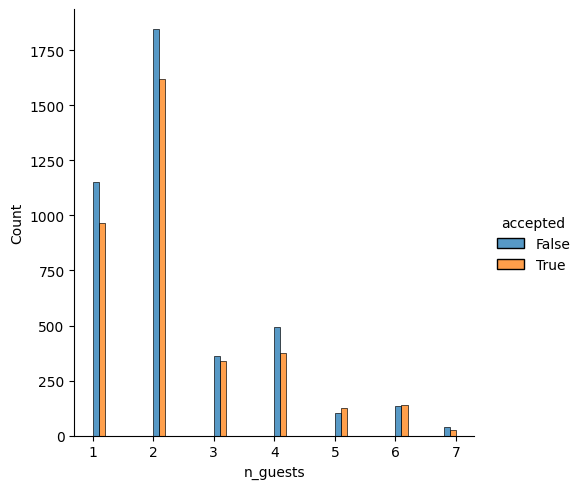

In [21]:
#Number of guests stayed

contacts_less8 = contacts[contacts['n_guests'] < 8]
sns.displot(contacts_less8, x = 'n_guests', hue = 'accepted', multiple="dodge")
plt.show()

Guests were capped at **fewer than 8**, as only **1.46% (114 entries)** in the contacts dataset had **8 or more guests**. Removing these outliers improved visualization of the majority distribution.  

While **2 guests** is the most common booking choice, **1 guest** is the most frequently searched. This suggests a potential shortage of viable single-guest accommodations.

In [22]:
#Conversion rate from accepting to booking

contacts['ts_booking_at'].count()/contacts['ts_accepted_at'].count()

np.float64(0.5993934381031155)

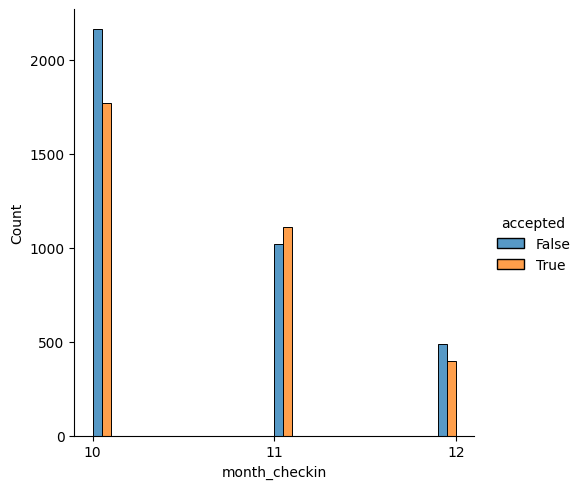

In [23]:
#Timeframe of when guests or accepted vs rejected

contacts['month_checkin'] = contacts['ds_checkin'].dt.month #Extract month from checkin date
contacts_checkin = contacts[contacts['month_checkin'] > 9] #Use only peak season months (Oct, Nov, Dec)

#Distribution of checkin among October, November, and December and split by acceptance
sns.displot(contacts_checkin, x='month_checkin', hue = 'accepted', multiple="dodge")
plt.xticks([10, 11, 12])
plt.show()

In [24]:
#Merge datasets for more analysis

merged_datasets = contacts.merge(searches, left_on='id_guest', right_on='id_user')

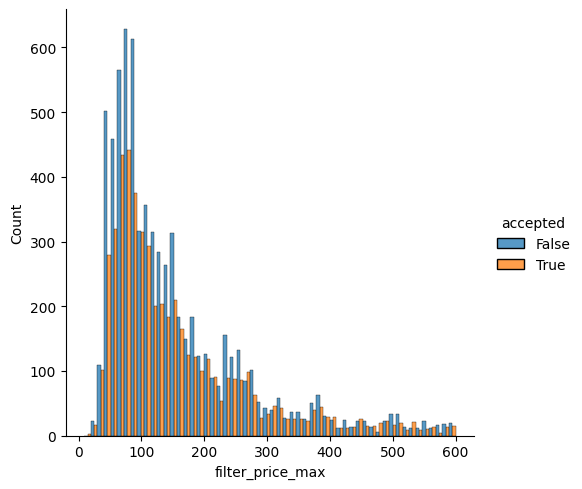

In [26]:
#Check difference between prices searched between accepted/rejected applicants

merged_pricemax_filter = merged_datasets.loc[(merged_datasets['filter_price_max'] <= 600)]

sns.displot(merged_pricemax_filter, x="filter_price_max", hue="accepted", multiple="dodge")
plt.show()

To improve trend visualization, **filter_price_max** was capped at **$600**, as only **14.25%** of the dataset exceeds this value.  

Overall, **rejections outnumber acceptances**, with an **average acceptance rate of 43%**.

In [28]:
#classify dataset based on filter_price_max

def label_price (row):
    if (row['filter_price_max'] >= 0) & (row['filter_price_max'] < 100):
        return '0-100'
    
    elif (row['filter_price_max'] >= 100) & (row['filter_price_max'] < 200):
        return '100-200'

    elif (row['filter_price_max'] >= 200) & (row['filter_price_max'] < 300):
        return '200-300'
    
    elif (row['filter_price_max'] >= 300) & (row['filter_price_max'] < 400):
        return '300-400'

    elif (row['filter_price_max'] >= 400) & (row['filter_price_max'] < 500):
        return '400-500'
    
    elif (row['filter_price_max'] >= 500) & (row['filter_price_max'] < 600):
        return '500-600'
    
    else:
        return '600+'

merged_datasets['classification_max_price'] = merged_datasets.apply(lambda row: label_price(row), axis=1)

merged_datasets.groupby('classification_max_price').agg({'accepted': 'mean'})

,accepted
classification_max_price,
0-100,0.411160
100-200,0.430308
200-300,0.431149
300-400,0.450488
400-500,0.485549
500-600,0.422297
600+,0.433122


**Based on this table, it can be seen that regardless of max_filter_price, people are rejected at similar rates**

In [29]:
#Find the acceptance rate by country

dataset_country = merged_datasets[['origin_country', 'accepted']]

#Find acceptance count by country and accepted
accepted_count = dataset_country.groupby(['origin_country', 'accepted']).agg({'origin_country':'count'})
accepted_count.columns = ['count_accepted']

#Find acceptance count by country
country_count = dataset_country.groupby(['origin_country']).agg({'origin_country':'count'})
country_count.columns = ['count_country']

#Merge datasets for easier manipulation 
acceptance_country = pd.merge(dataset_country, accepted_count,  how='left', on=['origin_country','accepted']) #Merge accepted count
acceptance_country = acceptance_country.drop_duplicates()

acceptance_country = pd.merge(acceptance_country, country_count, how='left', on=['origin_country']) #Merge total country count
acceptance_country = acceptance_country.sort_values(['count_country', 'accepted'], ascending = [False, True])
acceptance_country = acceptance_country[acceptance_country['count_country'] >= 100] #100 is used so there is a good amount of data to make assumptions
acceptance_country = acceptance_country[acceptance_country['accepted'] == True]

#Divide count_accepted column by count_country column to find acceptance rate by country
acceptance_country['acceptance_rate'] = acceptance_country['count_accepted']/acceptance_country['count_country']
acceptance_country.sort_values(['acceptance_rate'], ascending = True)

,origin_country,accepted,count_accepted,count_country,acceptance_rate
73,IN,True,138,874,0.157895
55,HR,True,159,530,0.300000
54,RU,True,83,239,0.347280
72,AT,True,83,239,0.347280
11,IT,True,1183,3137,0.377112
100,AE,True,59,154,0.383117
0,CA,True,407,993,0.409869
13,IE,True,1217,2951,0.412403
24,ES,True,794,1914,0.414838
49,RO,True,50,118,0.423729


India has the **lowest acceptance rate at 15%**, which is **half** that of the second lowest country. This significant gap warrants further investigation.